# Visualizing Earnings Based on College Majors


In this project we'll explore how the annual earnings of recent college graduates from different majors varies with diffrent set of parameters. For the major part, we will do it employ scatter plots, histograms, bar charts, and scatter matrix to  if we can draw any interesting insights from it. However, the main purpose of this project is to practice some of the data visualization tools.

Here is a discription of various columns that this data contains: 

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.



In [1]:
# Let's start with importing all the required libraries
import pandas as pd 
import matplotlib.pyplot as plt
# Running the jupyter magic so  that plots are displayed inline
%matplotlib inline
# read the csv file using pd.read_csv
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [11]:
# Let's convert the columns' names into more conventional form
def col(df_rg):
    for P in df_rg.columns:
        Q = P.lower()
        df_rg.rename({P:Q}, axis = 1, inplace = True) 
    return df_rg
recent_grads = col(recent_grads)     
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
rank                    173 non-null int64
major_code              173 non-null int64
major                   173 non-null object
total                   172 non-null float64
men                     172 non-null float64
women                   172 non-null float64
major_category          173 non-null object
sharewomen              172 non-null float64
sample_size             173 non-null int64
employed                173 non-null int64
full_time               173 non-null int64
part_time               173 non-null int64
full_time_year_round    173 non-null int64
unemployed              173 non-null int64
unemployment_rate       173 non-null float64
median                  173 non-null int64
p25th                   173 non-null int64
p75th                   173 non-null int64
college_jobs            173 non-null int64
non_college_jobs        173 non-null int64
low_wage_jobs          

- We see that there are few null values in our dataset so we will drop the corresponding rows (containing null values) so that it woudln't interfere with our data analysis (with matplotlib)  
- The fact that we have 172 row now (instead of 173 before) means there was only one row with the missing values 

In [15]:
recent_grads = recent_grads.dropna()
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
rank                    172 non-null int64
major_code              172 non-null int64
major                   172 non-null object
total                   172 non-null float64
men                     172 non-null float64
women                   172 non-null float64
major_category          172 non-null object
sharewomen              172 non-null float64
sample_size             172 non-null int64
employed                172 non-null int64
full_time               172 non-null int64
part_time               172 non-null int64
full_time_year_round    172 non-null int64
unemployed              172 non-null int64
unemployment_rate       172 non-null float64
median                  172 non-null int64
p25th                   172 non-null int64
p75th                   172 non-null int64
college_jobs            172 non-null int64
non_college_jobs        172 non-null int64
low_wage_jobs          

# Scatter Plots
The first task of ours is to find if there is coorelation between different parameters e.g. popular majors (total) and the post graduation salary(median). In the next stage we'll plot various scatter plots and try to interpret if any relationship b/w different parameters do exists or not. 

## Four things to look for in Scatter Plot 
- Direction (upwards or downwards)
- Linreaity (Linar or Non-Linear)
- Relationship Strength (Weak, Moderate, Strong)
- Outliers

Here is a quite useful youtube video you can watch to know more: 
https://www.youtube.com/watch?v=PE_BpXTyKCE

(0, 80000)

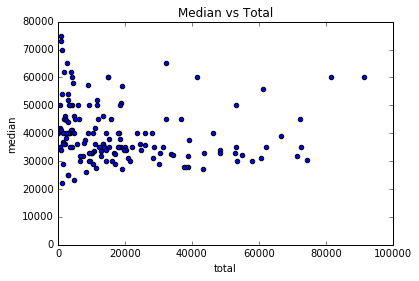

In [85]:
ax1 = plt.subplot()
ax1.scatter(recent_grads["total"], recent_grads["median"])
ax1.set_ylabel("median")
ax1.set_xlabel("total")
ax1.set_title("Median vs Total")
ax1.set_xlim(0,100000)
ax1.set_ylim(0,80000)

We can also use the following syntax to get the same plot in jupyter notebook (since we included %matplotlib inline in the beginning):

(0, 100000)

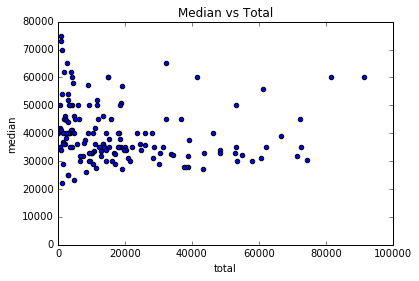

In [93]:
ax2 = recent_grads.plot(x= "total", y= "median", kind = "scatter")
ax2.set_title("Median vs Total")
ax2.set_ylim (0,80000)
ax2.set_xlim(0, 100000)

- As you can observe from this scatter plot: When the no. of people in a given major increases, the salary decreases sharply at first & then it become constant. 
- However, this relationship is not strong (can sya it's moderate) 

(0, 120000)

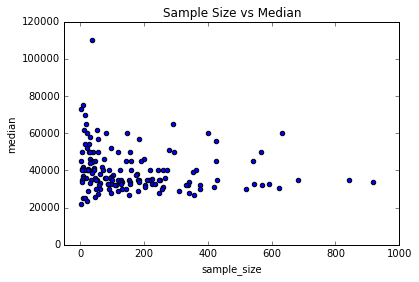

In [88]:
ax3 = recent_grads.plot(x= "sample_size", y = "median", kind = "scatter")
ax3.set_title ("Sample Size vs Median")
ax3.set_xlim(-50,1000)
ax3.set_ylim(0,120000)

(0, 0.2)

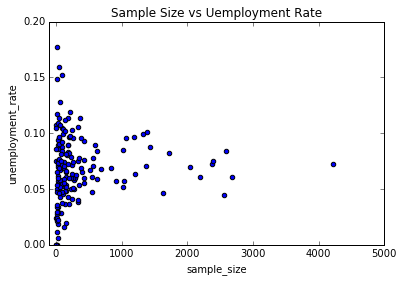

In [90]:
ax4 = recent_grads.plot(x= "sample_size", y = "unemployment_rate", kind = "scatter")
ax4.set_title ("Sample Size vs Uemployment Rate")
ax4.set_xlim(-100,5000) # 5000
ax4.set_ylim(0,.20)

(1000, 120000)

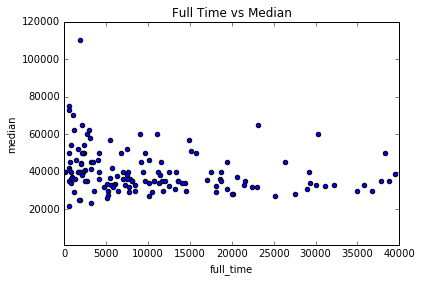

In [92]:
ax5 = recent_grads.plot(x= "full_time", y = "median", kind = "scatter")
ax5.set_title ("Full Time vs Median")
ax5.set_xlim(0,40000) #300000
ax5.set_ylim(1000, 120000)

(0, 0.2)

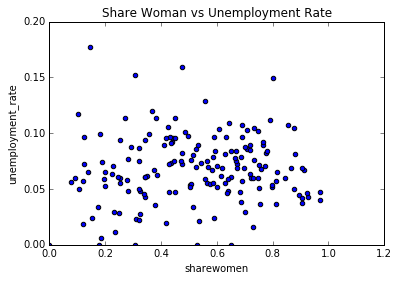

In [59]:
ax6 = recent_grads.plot(x= "sharewomen", y = "unemployment_rate", kind = "scatter")
ax6.set_title ("Share Woman vs Unemployment Rate")
ax6.set_xlim(0,1.2)
ax6.set_ylim(0, .2)

* From this scatter plot we can conclude that the unemployment rate increases with the inecrese of the share of women in major. However, this relationship is weak 

(0, 120000)

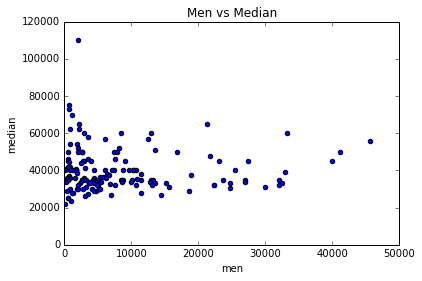

In [77]:
ax7 = recent_grads.plot(x= "men", y = "median", kind = "scatter")
ax7.set_title ("Men vs Median")
ax7.set_xlim(0,50000) # 200000
ax7.set_ylim(0, 120000)

(0, 120000)

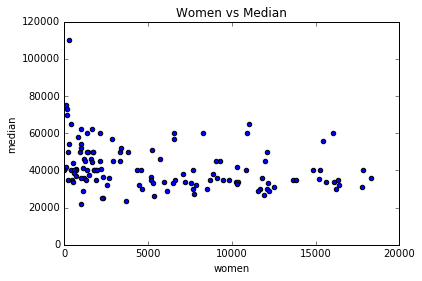

In [94]:
ax8 = recent_grads.plot(x= "women", y = "median", kind = "scatter")
ax8.set_title ("Women vs Median")
ax8.set_xlim(0,20000) # 350000
ax8.set_ylim(0, 120000)

- For both "Women vs Median" and "Men vs Median" plots, the trend seems similar to the "total vs median" scatter plot we just discussed above i.e. More people with given major correspond to less salary post graduation.  

# Histogram Plots

Again there are two ways to plot histogram: 

(1) The usual method:

ax1 = plt.subplot()

ax1.hist(pd.series, bins = 25, range(0,5))

plt.show()

(2) In jupyter notebook we can directly go with:
pd.series.plot(kind = "hist", bins = 25, range = (0,5))

Here we'll just use the second method

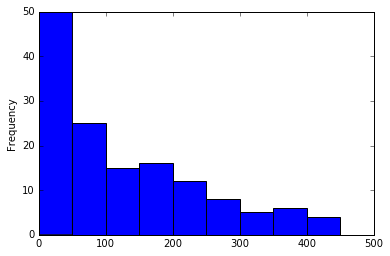

In [126]:
recent_grads["sample_size"].plot (kind = "hist", bins = 10, range= (0,500))

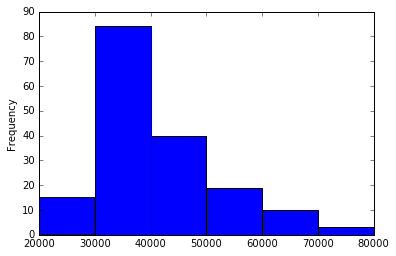

In [130]:
recent_grads["median"].plot (kind = "hist", bins = 6, range= (20000,80000))

- For ~ 47 % of the recent grads have the annual earning lies between 30,000 to 40,000

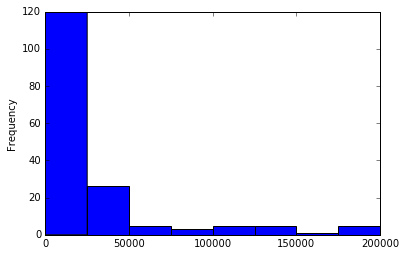

In [134]:
recent_grads["employed"].plot (kind = "hist", bins = 8, range = (0,200000))

- For ~70% of the majors, the employment number is <= 25,000

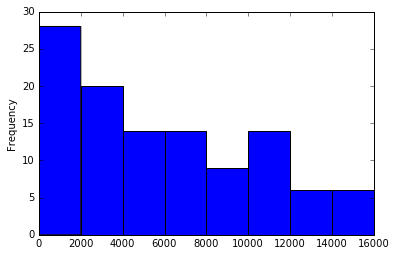

In [144]:
recent_grads["full_time"].plot (kind = "hist", bins = 8, range = (0, 16000))

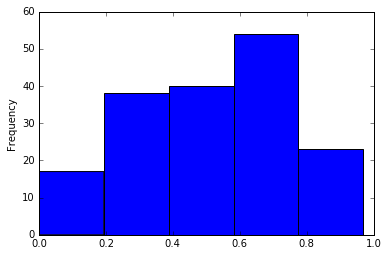

In [147]:
recent_grads["sharewomen"].plot (kind = "hist", bins = 5)

- For most of the majors the women share lies between 0.6 to 0.8
- For only 12% of the majors, the women share is more than 0.8

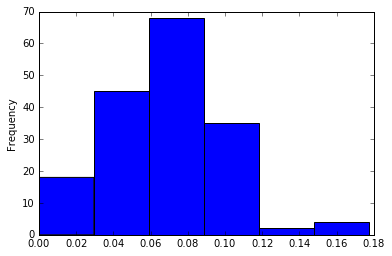

In [148]:
recent_grads["unemployment_rate"].plot (kind = "hist", bins = 6)

- For about 40% of the majors, unemployment rate lies between .06 and .08

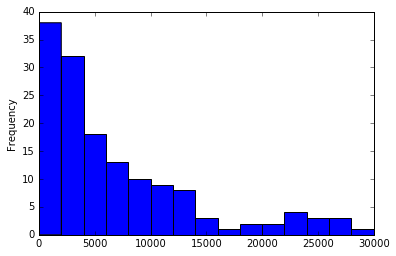

In [152]:
recent_grads["men"].plot (kind = "hist", bins = 15, range= (0,30000))

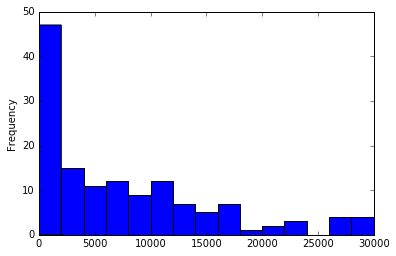

In [158]:
recent_grads["women"].plot (kind = "hist", bins = 15, range=(0,30000))

# Scatter Matrix Plot

In [159]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6f5d1def0>,
      dtype=object)

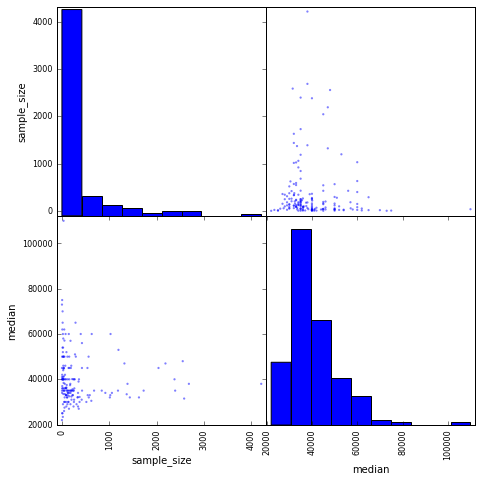

In [165]:
scatter_matrix(recent_grads[["sample_size", "median"]], figsize =(7.5,7.5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6f5b40ac8>,
      dtype=object)

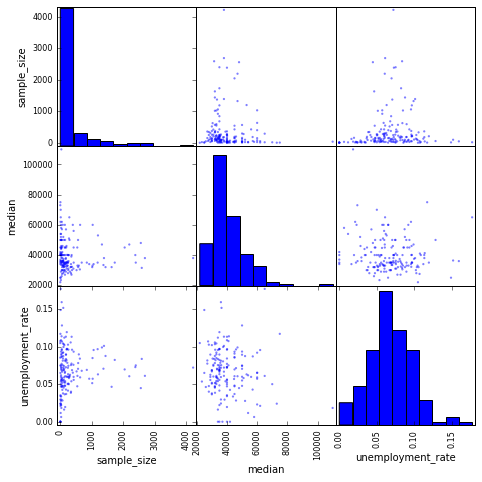

In [166]:
scatter_matrix(recent_grads[["sample_size", "median", "unemployment_rate"]], figsize =(7.5,7.5))

- There is not much correlation between the the plots, except that there is a moderate to weak relation of decrease in median(salary) with increase in sharewomen. Let's more study about this correlation wit bar graphs below 

# Bar Graph
The first few rows in our data contains values for Engneering majors while last rows contains Non-Engineering majors

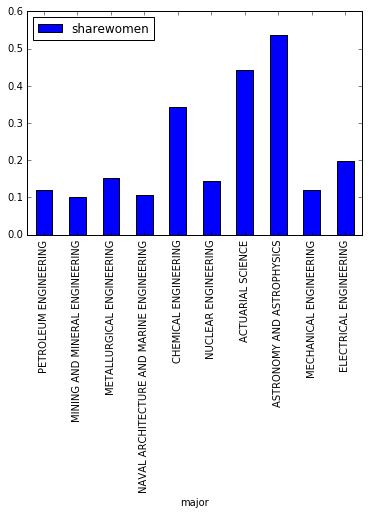

In [174]:
recent_grads[:10].plot(x="major", y="sharewomen", kind= "bar", colormap="winter")

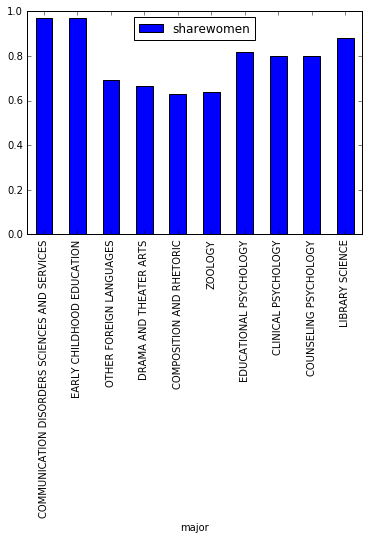

In [185]:
recent_grads.tail(10).plot(x="major", y="sharewomen", kind= "bar", colormap="winter")

Now that we know the sharwomen in first 10 rows is lesser than the last 10 rows. Lets calculate unemployment rate and median (salary) for these rows

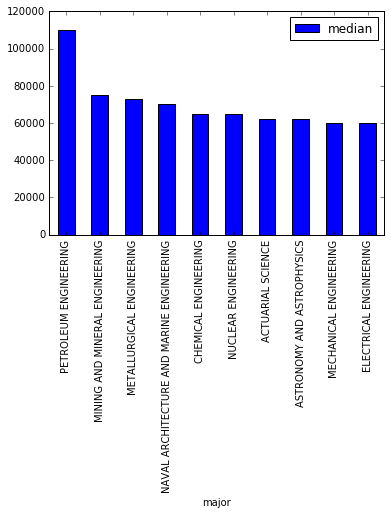

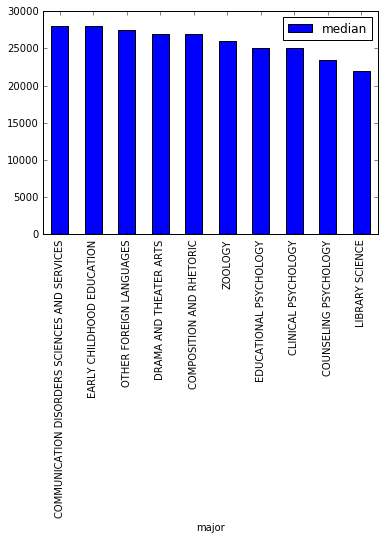

In [187]:
recent_grads[:10].plot(x="major", y="median", kind= "bar", colormap="winter")
recent_grads.tail(10).plot(x="major", y="median", kind= "bar", colormap="winter")


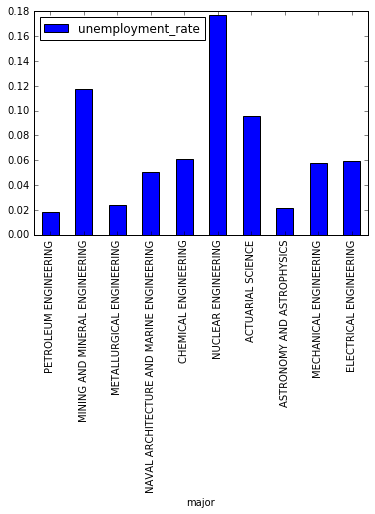

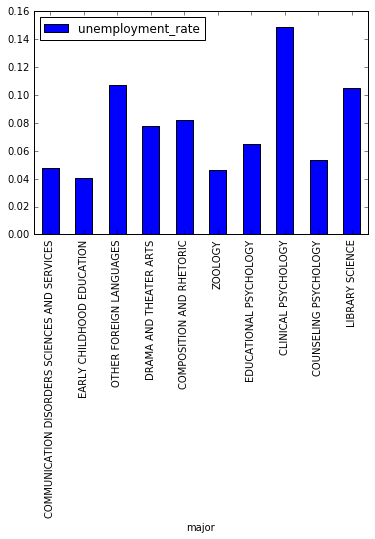

In [189]:
recent_grads[:10].plot(x="major", y="unemployment_rate", kind= "bar", colormap="winter")
recent_grads.tail(10).plot(x="major", y="unemployment_rate", kind= "bar", colormap="winter")

This bar plots supports our statement there is a moderate to weak relation of decrease in median(salary) with increase in sharewomen 

### Learning Summary 

Concepts Explored: pandas, matplotlib, histograms, bar charts, scatterplots, scatter_matrices

Python functions and methods used: .plot(), scatter_matrix(), hist(), iloc[], .head(), .tail(), .describe()